Author: Sridhar Nerur
This notebook demostrates the use of sklearn's LDA for Topic Modeling.

In [2]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 1.9MB/s ta 0:00:011
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:

import numpy as np  # a conventional alias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import glob
import os
import string #if you wish to remove punctuation/digits
import mglearn
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


In [7]:
os.chdir("/Users/snerur/Dropbox/dc/lemmatized")
files = glob.glob("*.txt")


In [5]:
def get_topics(model, vectorizer, model_name, df, top_n = 20):
        result = []
        for idx, topic in enumerate(model.components_):
            #print("Topic %d:" % (idx))
            topic_label = model_name + "_topic_" + str(idx)
            score = "SCORE_" + str(idx)
            aList = [(vectorizer.get_feature_names()[i], topic[i])
                            for i in topic.argsort()[:-top_n - 1:-1]]
            l1, l2 = zip(*aList)
            df[topic_label] = l1
            df[score] = l2

In [8]:
num_topics = 10
multiplier = int(num_topics / 2)
    
corpus = []

for f in files:
    f_input = open(f, "r")
    txt = f_input.read()
    corpus.append(txt)

In [9]:
vectorizer = CountVectorizer(stop_words = 'english')
dtm = vectorizer.fit_transform(corpus)

lda100 = LatentDirichletAllocation(n_components=num_topics, learning_method="batch",
                                   max_iter=500, random_state=0)
document_topics100 = lda100.fit_transform(dtm)

In [10]:
document_topics100.shape

(1908, 10)

In [11]:
document_topics100[:3,:]

array([[0.00232565, 0.00232606, 0.00232591, 0.69245136, 0.00232593,
        0.00232624, 0.00232615, 0.28894051, 0.00232613, 0.00232607],
       [0.0009435 , 0.60189077, 0.00094358, 0.16015805, 0.00094367,
        0.00094363, 0.00094368, 0.23134576, 0.00094366, 0.00094369],
       [0.00196093, 0.00196131, 0.00196106, 0.33490165, 0.40561185,
        0.00196145, 0.24575815, 0.00196111, 0.00196123, 0.00196127]])

In [17]:
#topics and their words
#len(vectorizer.vocabulary_) should give you 8234 - the number of words
lda100.components_.shape #gives 10 topics and 8234 words


(10, 8234)

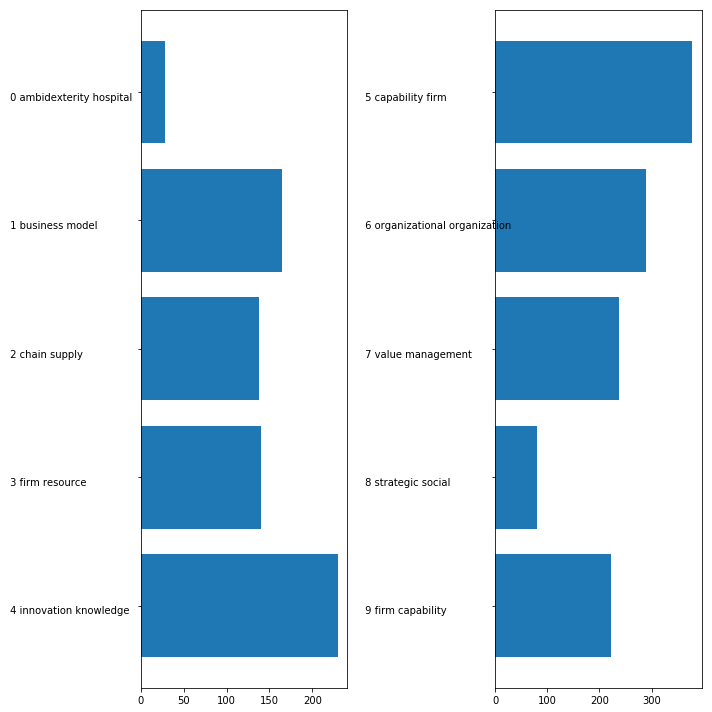

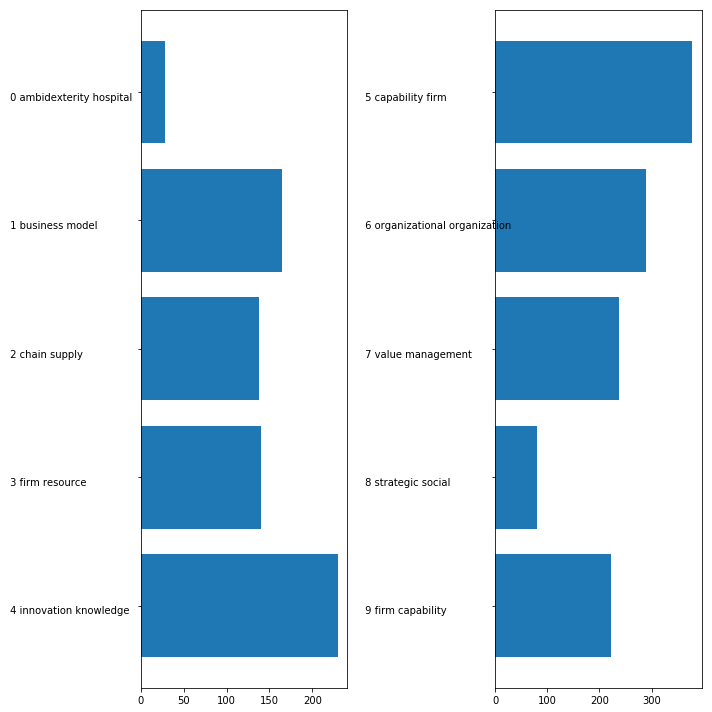

In [21]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names())

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]


# two column bar chart:
for col in [0, 1]:
    start = col * multiplier
    end = (col + 1) * multiplier
    ax[col].barh(np.arange(multiplier), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(multiplier))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    #ax[col].set_xlim(0, 800)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
plt.show()


In [20]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
mglearn.tools.print_topics(topics=range(num_topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
ambidexterity business      chain         firm          innovation    
hospital      model         supply        resource      knowledge     
trajectory    dynamic       capability    country       firm          
power         capability    sustainabilityfamily        product       
dynamic       change        supplier      company       capacity      
algorithm     market        firm          growth        relationship  
control       industry      npd           market        absorptive    
sensor        technology    management    institutional capital       
use           strategic     resilience    base          technological 
time          process       sustainable   internationalizationeffect        
optimization  digital       dynamic       manager       technology    
collaboration environment   process       strategy      industry      
